# Define ( inconsistencies and existing issues)

 
* Check patient id and remove duplicate rows

* Patient age quantile (0-19)

* Sars-Cov-2 exam result has values positive and negative. Need to replace 0 for negative and 1 for positive

* Pateint admiited to regular ward ( name needs to be modified)

* Pateint admiited to semi-icu ( modify name)

* hematocrit - make blanks as nulls 

* mean platelet volume (modify name)

* Mean corpuscular hemoglobin concentraion (modify name)

* Mean corpuscular volume (modify name)

* Red blood cell distribution width (RDW) (modify name)

* Encode detected as 1 and not detected as 0 
Respiratory Syncytial Virus, Influenza A, Influenza B, Parainfluenza 1, CoronavirusNL63, Rhinovirus/Enterovirus, Coronavirus HKU1, Parainfluenza 3, Chlaymidophila pnuemoniae, adenovirus, parainfluenza 4, Coronavirus229E, CoronavirusOC43, Inf A H1N1 2009, Bordetella pertusis, Metapnuemovirus, Parainfluenza 2, 

* Remove columns - Mycoplasma pnuemoniae, Fio2, Myeloblasts, Urine_Esterase ( absent/not_done), Urine - Bile pigments, Urine Ketone, Urine Nitrite, Urine Protein, Urine Sugar, Urine - Hyaline Cylinders, Urine Granular cylinders, Urine - Yeasts, PTT, PT Activity, D-Dimer, 

* Change name - Proteina C reactiva to C-reactive protein or CRP

* Influenza B Rapid test, Inf A rapud test ( name change) encode positive as 1, negative as 0  

* Merge with InfA and B columns

* Strepto A ( not_done to be changed to null values)

* pC02 vs pO2 venous blood gas analysis, check to see if its redundant

* Urine ph - replace nao realizado as null

* Urine hemoglobin - not_done to be replaced as null 

* Urine - Urobilinogen (normal, not_done) - check if can be removed

* Urine Crystals -- > Categorical variables
 









# Code

In [34]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [35]:
#from google.colab import drive
#drive.mount('/content/drive')

In [36]:
#df = pd.read_excel('/content/drive/My Drive/Minicapstone/dataset.xlsx')
df=pd.read_excel('dataset.xlsx')

In [37]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.shape
#df.describe()

(5644, 111)

In [39]:
# Renaming some of the columns for easier access

df.rename(columns = {'Patient addmited to regular ward (1=yes, 0=no)' : 'regular_ward',
                     'Patient addmited to semi-intensive unit (1=yes, 0=no)' : 'semi_icu',
                     'Patient addmited to intensive care unit (1=yes, 0=no)' : 'icu',
                     'SARS-Cov-2 exam result' : 'sars_cov2',
                     'Mean corpuscular hemoglobin concentration (MCHC)' : 'MCHC',
                     'Mean corpuscular hemoglobin (MCH)' : 'MCH',
                     'Mean corpuscular volume (MCV)' : 'MCV',
                     'Red blood cell distribution width (RDW)' : 'RBC_DW',
                     'Proteina C reativa mg/dL' : 'CRP'      # C-Reactive Protein
                     }, inplace=True)

In [40]:
df.head()

,Patient ID,Patient age quantile,sars_cov2,regular_ward,semi_icu,icu,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,MCH,Eosinophils,MCV,Monocytes,RBC_DW,Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Replacing 'negative' as 0 and 'positive' as 1 and other values across the dataframe

df.replace({'negative': 0, 'positive' : 1, 
            'not_detected': 0, 'detected':1, 
            'not_done' : np.nan, 'Não Realizado' : np.nan,
            'absent' : 0, 'normal' : 0
            }, inplace=True)

In [42]:
df.head()

,Patient ID,Patient age quantile,sars_cov2,regular_ward,semi_icu,icu,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,MCH,Eosinophils,MCV,Monocytes,RBC_DW,Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.sars_cov2.value_counts()

0    5086
1     558
Name: sars_cov2, dtype: int64

In [44]:
cov_df = df.copy()

Now, we shall be looking at the percentage nulls column wise and selecting the features accordingly. 

Patient ID                                           0.00
Patient age quantile                                 0.00
sars_cov2                                            0.00
regular_ward                                         0.00
semi_icu                                             0.00
icu                                                  0.00
Influenza B                                         76.01
Respiratory Syncytial Virus                         76.01
Influenza A                                         76.01
Rhinovirus/Enterovirus                              76.05
Inf A H1N1 2009                                     76.05
CoronavirusOC43                                     76.05
Coronavirus229E                                     76.05
Parainfluenza 4                                     76.05
Adenovirus                                          76.05
Chlamydophila pneumoniae                            76.05
Parainfluenza 3                                     76.05
Coronavirus HK

(array([ 6.,  0.,  0.,  0.,  0.,  0.,  0., 17., 16., 72.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

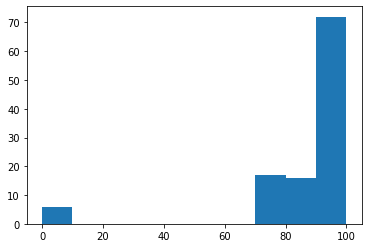

In [45]:
pct_null = cov_df.isna().mean().round(4)*100
pct_null.sort_values(ascending=True).head(50)
plt.hist(pct_null)

In [46]:
null_series = pct_null[pct_null > 96.5]
cov_df = cov_df[[col for col in cov_df.columns if col not in null_series]]
cov_df.head()
cov_df.shape

,Patient ID,Patient age quantile,sars_cov2,regular_ward,semi_icu,icu,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,MCH,Eosinophils,MCV,Monocytes,RBC_DW,Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,CRP,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Strepto A
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0.0,0.0,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(5644, 49)

In [47]:
#change columns names to alphanumeric
cov_df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in cov_df.columns]
cov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 49 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient_ID                                        5644 non-null   object 
 1   Patient_age_quantile                              5644 non-null   int64  
 2   sars_cov2                                         5644 non-null   int64  
 3   regular_ward                                      5644 non-null   int64  
 4   semi_icu                                          5644 non-null   int64  
 5   icu                                               5644 non-null   int64  
 6   Hematocrit                                        603 non-null    float64
 7   Hemoglobin                                        603 non-null    float64
 8   Platelets                                         602 non-null    float64
 9   Mean_platelet_volum

In [48]:
cov_df = cov_df[cov_df['Influenza_A'].notna()]
cov_df.shape

(1354, 49)

In [49]:
cov_df = cov_df[cov_df['Leukocytes'].notna()]
cov_df.shape

(366, 49)

In [50]:
cov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 1 to 5618
Data columns (total 49 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient_ID                                        366 non-null    object 
 1   Patient_age_quantile                              366 non-null    int64  
 2   sars_cov2                                         366 non-null    int64  
 3   regular_ward                                      366 non-null    int64  
 4   semi_icu                                          366 non-null    int64  
 5   icu                                               366 non-null    int64  
 6   Hematocrit                                        366 non-null    float64
 7   Hemoglobin                                        366 non-null    float64
 8   Platelets                                         366 non-null    float64
 9   Mean_platelet_volume

In [51]:
liver = cov_df.dropna(subset=['Potassium'], axis=0)
liver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 1 to 5618
Data columns (total 49 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient_ID                                        265 non-null    object 
 1   Patient_age_quantile                              265 non-null    int64  
 2   sars_cov2                                         265 non-null    int64  
 3   regular_ward                                      265 non-null    int64  
 4   semi_icu                                          265 non-null    int64  
 5   icu                                               265 non-null    int64  
 6   Hematocrit                                        265 non-null    float64
 7   Hemoglobin                                        265 non-null    float64
 8   Platelets                                         265 non-null    float64
 9   Mean_platelet_volume

In [52]:
liver.drop(columns=['Influenza_B__rapid_test','Influenza_A__rapid_test','Strepto_A'], axis=1, inplace=True)
liver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 1 to 5618
Data columns (total 46 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient_ID                                        265 non-null    object 
 1   Patient_age_quantile                              265 non-null    int64  
 2   sars_cov2                                         265 non-null    int64  
 3   regular_ward                                      265 non-null    int64  
 4   semi_icu                                          265 non-null    int64  
 5   icu                                               265 non-null    int64  
 6   Hematocrit                                        265 non-null    float64
 7   Hemoglobin                                        265 non-null    float64
 8   Platelets                                         265 non-null    float64
 9   Mean_platelet_volume

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
liver.sars_cov2.value_counts()

0    219
1     46
Name: sars_cov2, dtype: int64

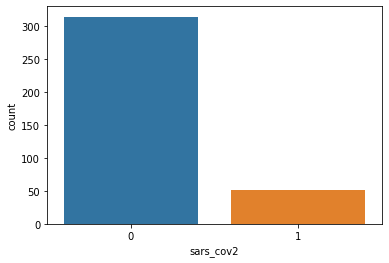

In [54]:
sns.countplot(cov_df['sars_cov2'])

In [55]:
liver.fillna(value=-20, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [56]:
liver.to_csv('icu_without_sampling.csv')   # For further use in Task1- Covid prediction and Task 2- Admission Prediction

In [57]:
## Upsampling 

liv_0 = liver[liver['sars_cov2']==0]
liv_1 = liver[liver['sars_cov2']==1]
len(liv_1), len(liv_0)

(46, 219)

In [58]:
from sklearn.utils import resample
liv_1_upsampled = resample(liv_1,replace=True,n_samples=127,random_state=123)  # With replacement
# Combine majority class with upsampled minority class
liv_upsampled = pd.concat([liv_0, liv_1_upsampled])

In [59]:
liv_upsampled['sars_cov2'].value_counts()

0    219
1    127
Name: sars_cov2, dtype: int64

In [60]:
## Downsampling

liv_0_downsampled = resample(liv_0, replace=True, n_samples=127,random_state=123 )
liv_downsampled = pd.concat([liv_1, liv_0_downsampled])

In [61]:
liv_sampled = pd.concat([liv_0_downsampled, liv_1_upsampled])
liv_sampled['sars_cov2'].value_counts()

1    127
0    127
Name: sars_cov2, dtype: int64

In [62]:
features = liv_sampled.drop(['Patient_ID','sars_cov2'], axis=1)
target = liv_sampled['sars_cov2']
X = features.values
y = target.values

In [64]:
# event rate is close to 15%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)


In [65]:
#seed =1234
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
predictions = model.predict(X_test)

In [67]:
def plot_confusion_matrix(y_test, y_pred):    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Non_covid','Covid']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [68]:
print('----------------Logistic Regression Classifier----------------------')
print('Training accuracy: ',model.score(X_train,y_train))
print('Testing accuracy: ', model.score(X_test,y_test))

----------------Logistic Regression Classifier----------------------
Training accuracy:  0.8870056497175142
Testing accuracy:  0.8441558441558441


[[32  7]
 [ 5 33]]


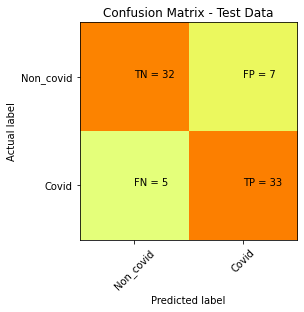

In [69]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(y_test, predictions)

In [90]:
TP = 33
TN = 32
FP = 5
FN = 7

In [91]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.82      0.87      0.85        38

    accuracy                           0.84        77
   macro avg       0.84      0.84      0.84        77
weighted avg       0.85      0.84      0.84        77



In [92]:
y_test, predictions

(array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0]),
 array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0]))

In [93]:
len(y_test)

77

AUC: 0.921727395411606


Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

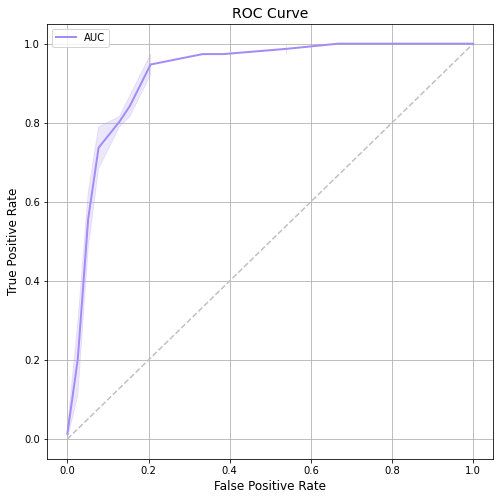

In [110]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
#print(len(y_test))
#print(len(model.predict_proba(X_test)))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1]) 
print('AUC:',metrics.auc(fpr,tpr))


from sklearn.metrics import roc_auc_score, roc_curve, auc
f, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], '--', color='silver')
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1]) 
plt.grid(True)
sns.lineplot(x=fpr, y=tpr, color=sns.color_palette("husl", 8)[-2], linewidth=2, label="AUC")


In [111]:
# print the first 10 predicted class with default threshold of .5
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [112]:
model.predict_proba(X_test)[:10,:]

array([[6.88274015e-01, 3.11725985e-01],
       [9.15861476e-02, 9.08413852e-01],
       [1.65324857e-02, 9.83467514e-01],
       [9.99821753e-01, 1.78247313e-04],
       [1.48304968e-01, 8.51695032e-01],
       [1.03009098e-06, 9.99998970e-01],
       [1.23729851e-01, 8.76270149e-01],
       [9.99845549e-01, 1.54451067e-04],
       [9.49101218e-01, 5.08987816e-02],
       [9.99682137e-01, 3.17862630e-04]])

In [113]:
# print the first 10 predicted probabilities for class 1  (Covid)
model.predict_proba(X_test)[0:10, 1]

array([3.11725985e-01, 9.08413852e-01, 9.83467514e-01, 1.78247313e-04,
       8.51695032e-01, 9.99998970e-01, 8.76270149e-01, 1.54451067e-04,
       5.08987816e-02, 3.17862630e-04])

In [114]:
# store the predicted probabilities for diabetic class for all records... 
y_pred_prob = model.predict_proba(X_test)[:, 1]
len(y_pred_prob)

77

In [115]:
# predict Covid if the predicted probability is greater than 0.4
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.4)[0]  # deciding the class of the 1st 10 records based on new threshold

In [116]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]
len(y_pred_class)

array([3.11725985e-01, 9.08413852e-01, 9.83467514e-01, 1.78247313e-04,
       8.51695032e-01, 9.99998970e-01, 8.76270149e-01, 1.54451067e-04,
       5.08987816e-02, 3.17862630e-04])

77

In [117]:
# print the first 10 predicted classes with the lower threshold. Note the change in class...
# with threshold of .5 (default) , the first data point would belong to 0 class i.e. non-diabetic 
y_pred_class[0:10]

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 0.])

In [118]:
# previous confusion matrix (default threshold of 0.5)
#print(metrics.confusion_matrix(y_test, y_pred_class))
y_test, y_pred_class

(array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0]),
 array([0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 1., 0., 1., 0., 1., 0.]))

In [119]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [120]:
evaluate_threshold(0.5)

Sensitivity: 0.868421052631579
Specificity: 0.8205128205128205


In [121]:
evaluate_threshold(0.4)
evaluate_threshold(0.3)

Sensitivity: 0.9736842105263158
Specificity: 0.7948717948717949
Sensitivity: 0.9736842105263158
Specificity: 0.7948717948717949


In [122]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.921727395411606


AUC: 0.921727395411606


Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

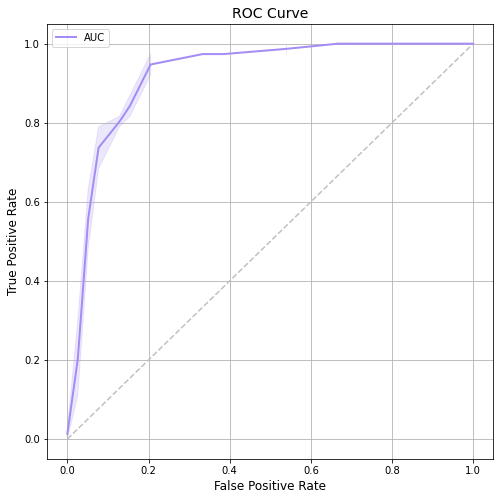

In [126]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
#print(len(y_test))
#print(len(model.predict_proba(X_test)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 
print('AUC:',metrics.auc(fpr,tpr))


from sklearn.metrics import roc_auc_score, roc_curve, auc
f, ax = plt.subplots(figsize=(8, 8))
plt.plot([0, 1], [0, 1], '--', color='silver')
plt.title('ROC Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 
plt.grid(True)
sns.lineplot(x=fpr, y=tpr, color=sns.color_palette("husl", 8)[-2], linewidth=2, label="AUC")


              precision    recall  f1-score   support

           0       0.97      0.79      0.87        39
           1       0.82      0.97      0.89        38

    accuracy                           0.88        77
   macro avg       0.90      0.88      0.88        77
weighted avg       0.90      0.88      0.88        77



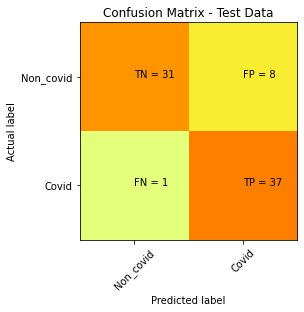

In [128]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_class))
#print(metrics.classification_report(y_test,predictions))
plot_confusion_matrix(y_test, y_pred_class)
